In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import copy
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from sklearn import metrics
import pickle

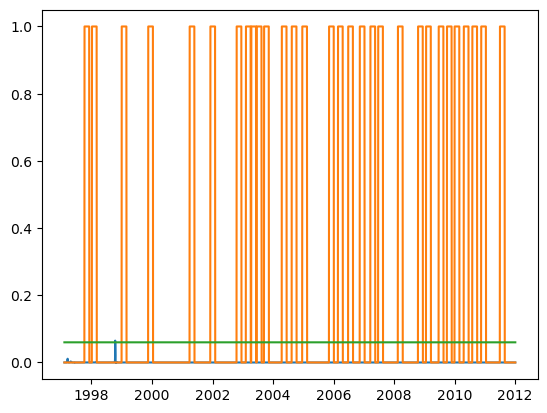

In [3]:
area1 = pd.read_csv("./area3/A1model_A3data.csv")
area1['pred'] = area1['pred'] + 0.03
area1 = area1.sort_values(by='date')
area1['date'] = pd.to_datetime(area1['date']) + pd.Timedelta(days=29)

r_n = range(0, area1.shape[0])

plt.plot(area1['date'].iloc[r_n], area1['probs'].iloc[r_n])
plt.plot(area1['date'].iloc[r_n], area1['actual'].iloc[r_n])
plt.plot(area1['date'].iloc[r_n], area1['pred'].iloc[r_n])

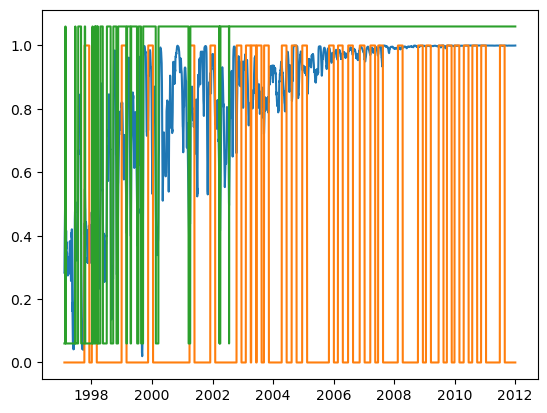

In [4]:
area2 = pd.read_csv("./area3/A2model_A3data.csv")
area2['pred'] = area2['pred'] + 0.03
area2 = area2.sort_values(by='date')
area2['date'] = pd.to_datetime(area2['date']) + pd.Timedelta(days=29)

r_n = range(0, area1.shape[0])

plt.plot(area2['date'].iloc[r_n], area2['probs'].iloc[r_n])
plt.plot(area2['date'].iloc[r_n], area2['actual'].iloc[r_n])
plt.plot(area2['date'].iloc[r_n], area2['pred'].iloc[r_n])

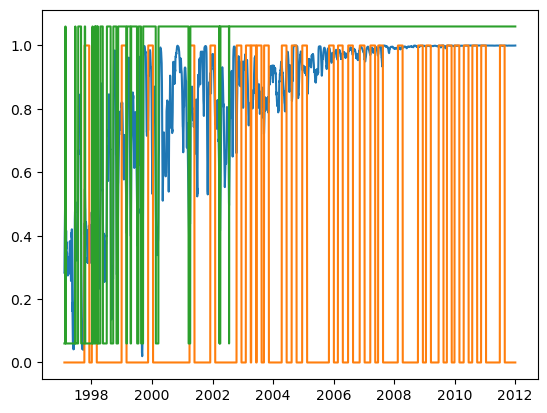

In [5]:
area3 = pd.read_csv("./area3/A1&2model_A1&2data.csv")
area3['pred'] = area3['pred'] + 0.03
area3 = area3.sort_values(by='date')
area3['date'] = pd.to_datetime(area3['date']) + pd.Timedelta(days=29)

r_n = range(0, area3.shape[0])

plt.plot(area3['date'].iloc[r_n], area3['probs'].iloc[r_n])
plt.plot(area3['date'].iloc[r_n], area3['actual'].iloc[r_n])
plt.plot(area3['date'].iloc[r_n], area3['pred'].iloc[r_n])

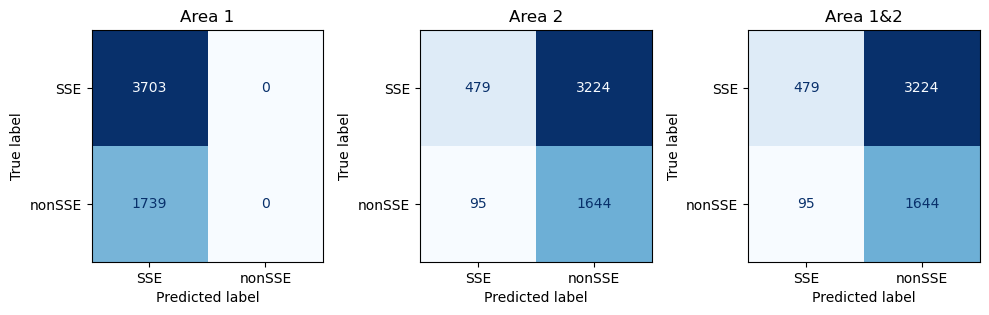

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
# Area1
actual = list(area1['actual'])
actual_int = [int(x) for x in actual]

predicted = list(area1['pred'])
predicted_int = [int(x) for x in predicted]

confusion_matrix =  metrics.confusion_matrix(actual_int, predicted_int)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot(ax=ax[0], cmap=plt.cm.Blues, colorbar=False)
cm_display.ax_.set_title("Area 1")

actual = list(area2['actual'])
actual_int = [int(x) for x in actual]

predicted = list(area2['pred'])
predicted_int = [int(x) for x in predicted]

confusion_matrix =  metrics.confusion_matrix(actual_int, predicted_int)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot(ax=ax[1], cmap=plt.cm.Blues, colorbar=False)
cm_display.ax_.set_title("Area 2")
fig.tight_layout()

actual = list(area3['actual'])
actual_int = [int(x) for x in actual]

predicted = list(area3['pred'])
predicted_int = [int(x) for x in predicted]

confusion_matrix =  metrics.confusion_matrix(actual_int, predicted_int)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot(ax=ax[2], cmap=plt.cm.Blues, colorbar=False)
cm_display.ax_.set_title("Area 1&2")
fig.tight_layout()

fig.savefig("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/figures/diffareaconfusion.pdf")

# predicted

Text(0.5, 1.0, 'Area 1')

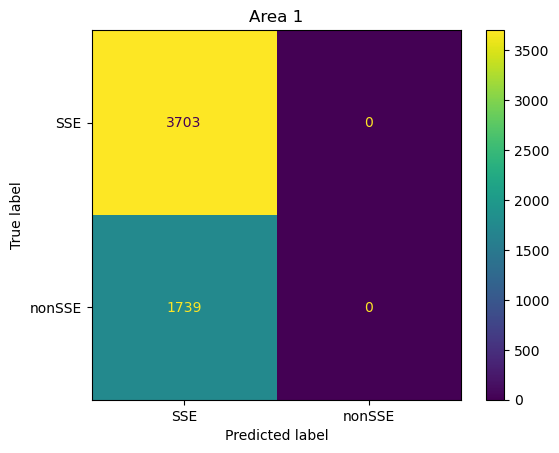

In [7]:
actual = list(area1['actual'])
actual_int = [int(x) for x in actual]

predicted = list(area1['pred'])
predicted_int = [int(x) for x in predicted]

confusion_matrix = metrics.confusion_matrix(actual_int, predicted_int)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot()
cm_display.ax_.set_title("Area 1")

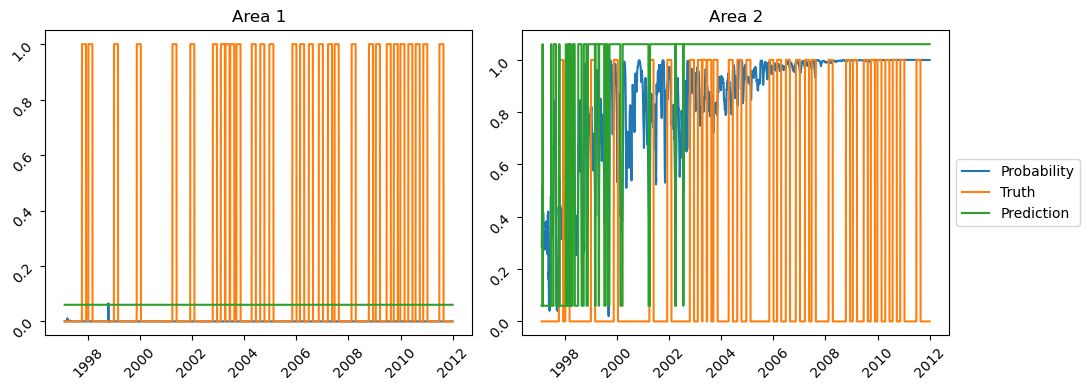

In [8]:
r_n = range(0, area3.shape[0])
fig, ax = plt.subplots(1, 2 , figsize=(11,4))

ax[0].plot(area1['date'].iloc[r_n], area1['probs'].iloc[r_n])
ax[0].plot(area1['date'].iloc[r_n], area1['actual'].iloc[r_n])
ax[0].plot(area1['date'].iloc[r_n], area1['pred'].iloc[r_n])
ax[0].tick_params(labelrotation=45)
ax[0].set_title("Area 1")

# ax[0]
ax[1].plot(area2['date'].iloc[r_n], area2['probs'].iloc[r_n])
ax[1].plot(area2['date'].iloc[r_n], area2['actual'].iloc[r_n])
ax[1].plot(area2['date'].iloc[r_n], area2['pred'].iloc[r_n])
ax[1].tick_params(labelrotation=45)
ax[1].set_title("Area 2")
ax[1].legend(['Probability', "Truth", "Prediction"], bbox_to_anchor=(1, 0.6))
fig.tight_layout()
fig.savefig("sameareaprobabilities.pdf")

# Training and Testing Curves

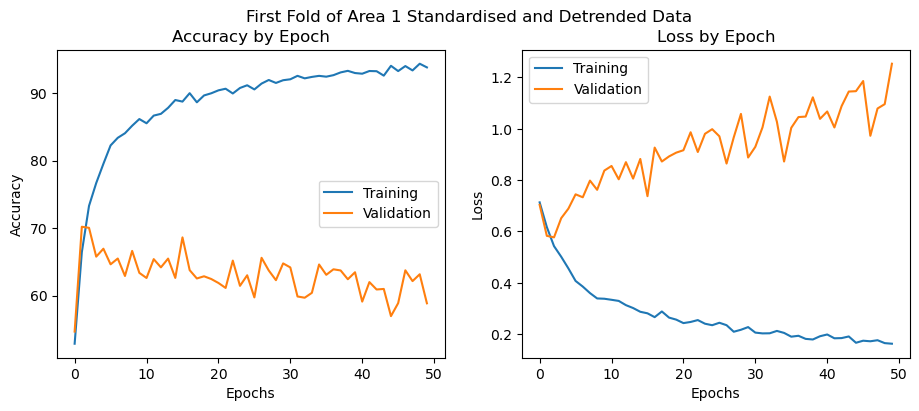

In [14]:
fig, ax = plt.subplots(1, 2 , figsize=(11,4))

pickle_in_acc = open("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/cross_validation_results/area1-detrend-standardised/first/accuracy_stats.obj", 'rb')
accuracy_stats = pickle.load(pickle_in_acc)
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot Accuracy
val_accuracy = train_val_acc_df[train_val_acc_df['variable'] == "val"]
train_accuracy = train_val_acc_df[train_val_acc_df['variable'] == "train"]
train_accuracy
ax[0].plot(train_accuracy['epochs'], train_accuracy['value'])
ax[0].plot(val_accuracy['epochs'], val_accuracy['value'])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by Epoch")
ax[0].legend(["Training", "Validation"])

pickle_in_loss = open("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/cross_validation_results/area1-detrend-standardised/first/loss_stats.obj", 'rb')
loss_stats = pickle.load(pickle_in_loss)
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
val_loss = train_val_loss_df[train_val_loss_df['variable'] == "val"]
train_loss = train_val_loss_df[train_val_loss_df['variable'] == "train"]

ax[1].plot(train_loss['epochs'], train_loss['value'])
ax[1].plot(val_loss['epochs'], val_loss['value'])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss by Epoch")
ax[1].legend(["Training", "Validation"])
fig.suptitle("First Fold of Area 1 Standardised and Detrended Data")
fig.savefig("area1-firstfold.pdf")